In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 18})

# Summary

* no missing data
* different satelites have different number of observations (max is 6320, min is 94)
* there are strong systematic nonlinear discrepancies between simaluted and real values for coordinates and for speeds
* there is an obvious dephasing between th esimulated and the real values. That is, in the beginning of the simulations, the matching between is almost perfect, but at the end of simulation there is clear phase difference.
* the model for simulation does not include the gradual shift of the orbit 
* the spread of speeds (V_max - V_min) is underestimated in many cases (almost never overestimated)

### Load the data

In [4]:
data = pd.read_csv('data/train.csv', index_col= 'id')
data.head(3)

,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
id,,,,,,,,,,,,,,
0,2014-01-01T00:00:00.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,2014-01-01T00:46:43.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2014-01-01T01:33:26.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768


In [6]:
sat_obs = data.sat_id.value_counts()
print('maxinum number of observations per satellite: {}'.format(sat_obs.max()))
print('minimum number of observations per satellite: {}'.format(sat_obs.min()))

maxinum number of observations per satellite: 6320
minimum number of observations per satellite: 94


### Difference between simulated and real values

Text(0, 0.5, 'x')

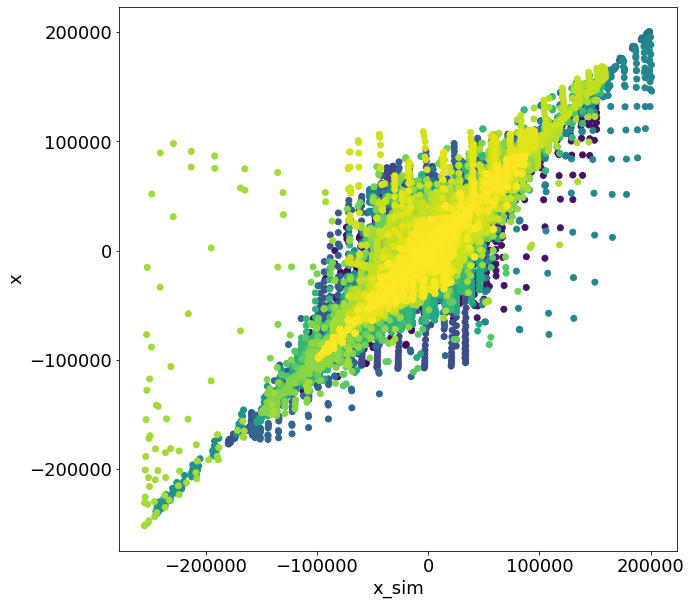

In [7]:
# see how different the simulated coordinates from predicted
plt.figure(figsize=(10,10))
plt.scatter(data.x_sim,data.x,c=data.sat_id)
plt.xlabel("x_sim")
plt.ylabel("x")

Text(0, 0.5, 'Vx')

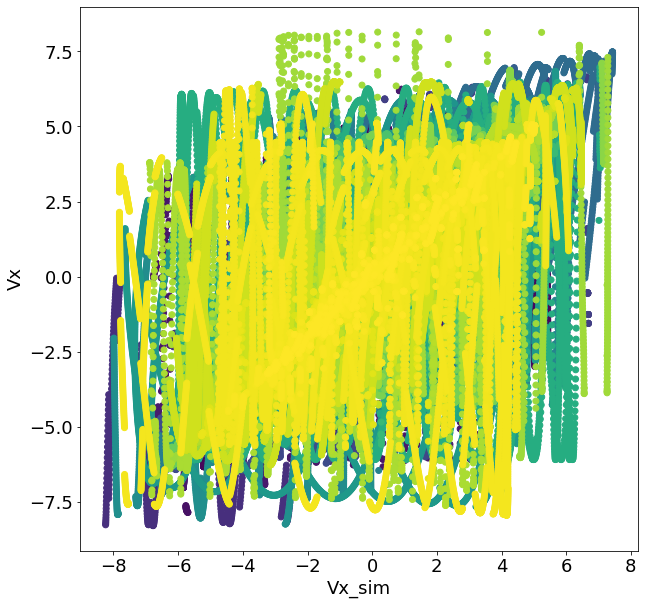

In [8]:
# see how different the simulated coordinates from predicted
plt.figure(figsize=(10,10))
plt.scatter(data.Vx_sim,data.Vx,c=data.sat_id)
plt.xlabel("Vx_sim")
plt.ylabel("Vx")

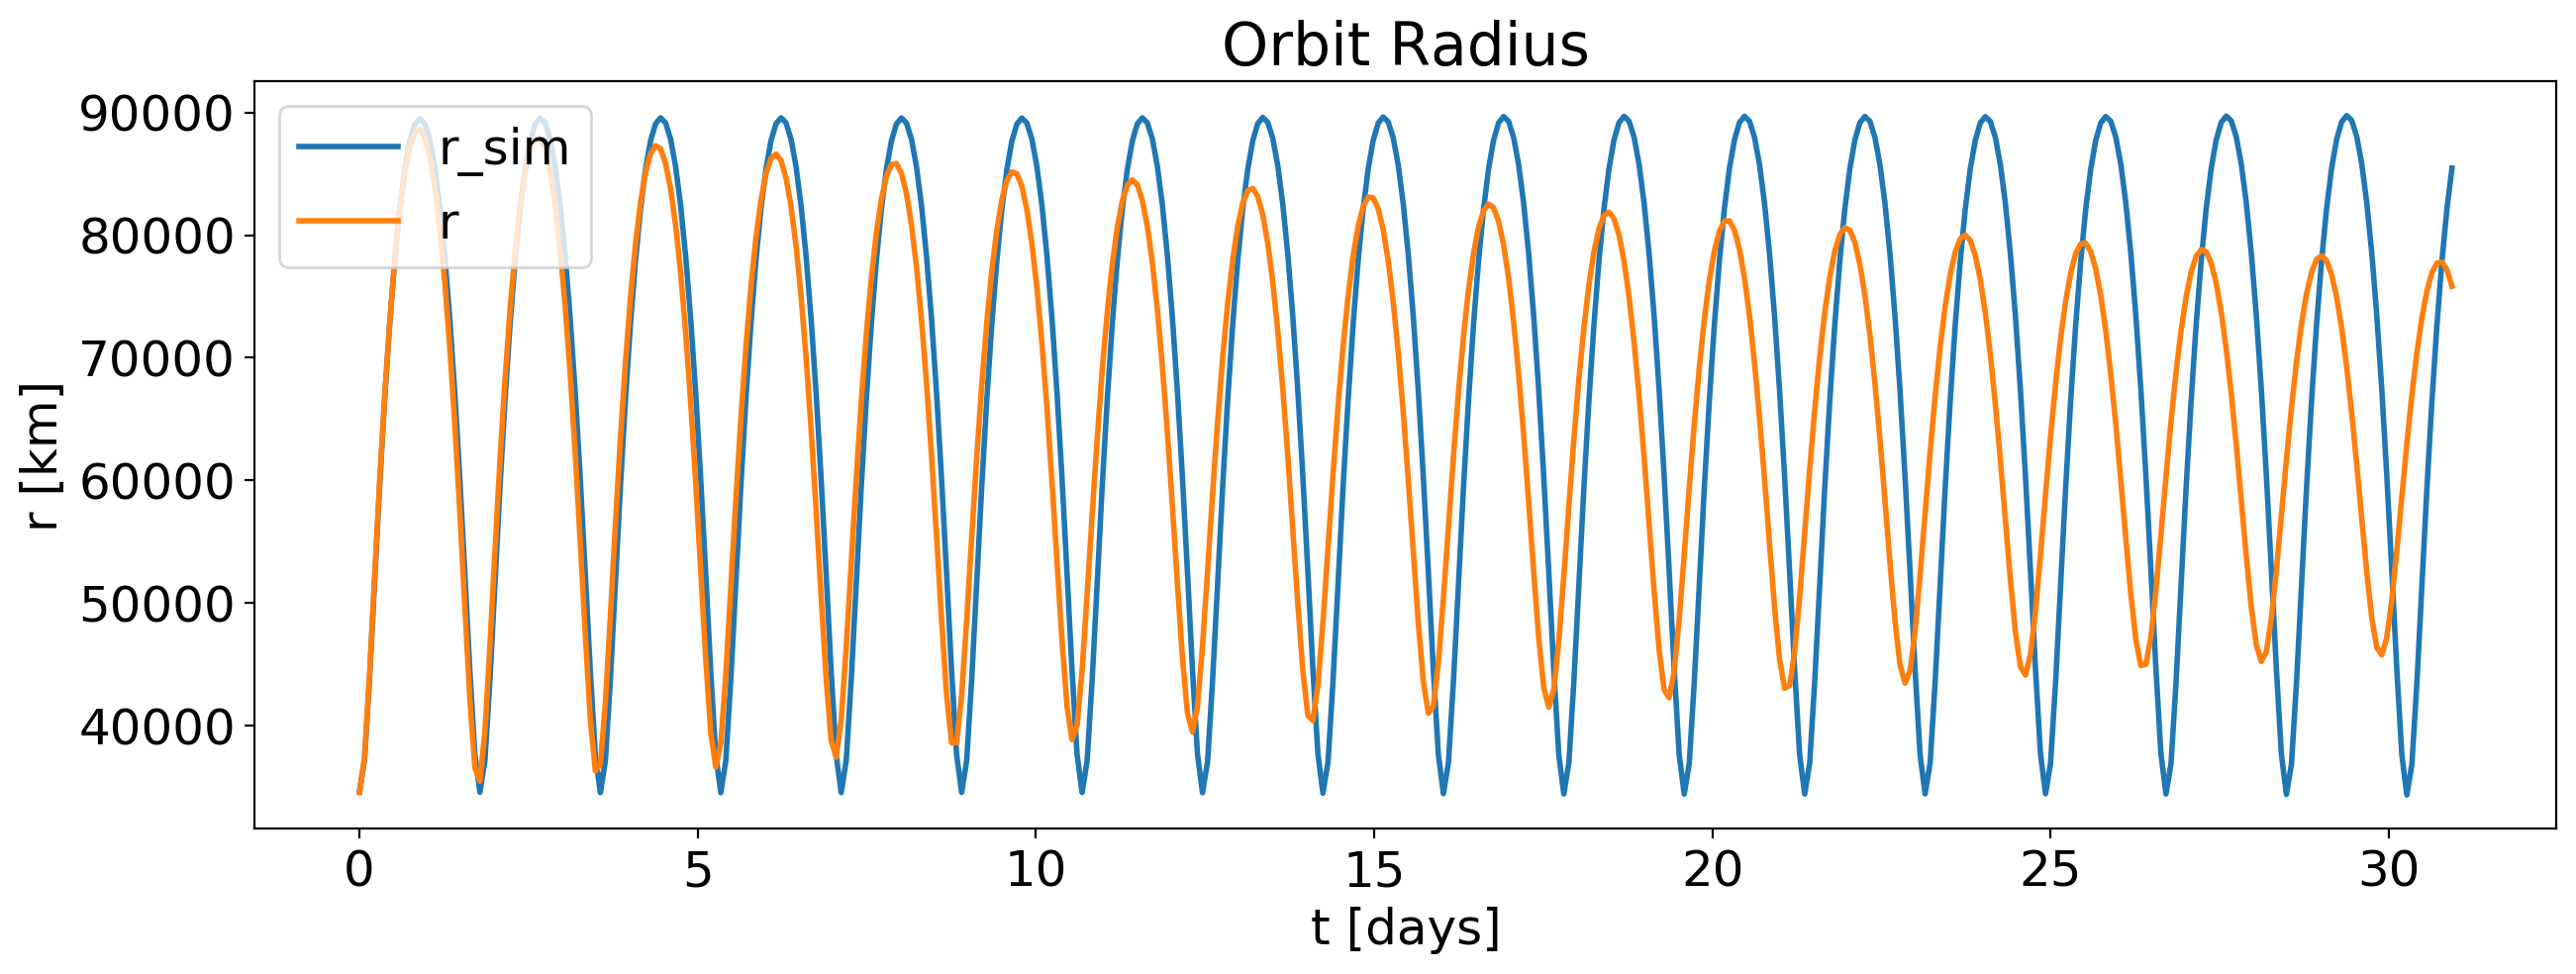

In [117]:
# low let's consider the time series
sat_data = data[data.sat_id == 6]
sat_data.loc[:,'t'] = ((pd.to_datetime(sat_data['epoch']) - pd.to_datetime(sat_data['epoch']).iloc[0]) /
                           np.timedelta64(1, 'D')).astype(float).values
sat_data.loc[:,'r'] = np.sqrt(sat_data.x**2+sat_data.y**2+sat_data.z**2)
sat_data.loc[:,'r_sim'] = np.sqrt(sat_data.x_sim**2+sat_data.y_sim**2+sat_data.z_sim**2)
plt.figure(figsize=(15,5), dpi = 200)
plt.plot(sat_data.t, sat_data.r_sim, label = 'r_sim', linewidth = 2)
plt.plot(sat_data.t, sat_data.r, label = 'r', linewidth = 2)
_ = plt.xlabel('t [days]')
_ = plt.ylabel('r [km]')
_ = plt.title('Orbit Radius')
# _ = plt.xlim([-5,30])
plt.legend(loc = 2)

### Time jumps

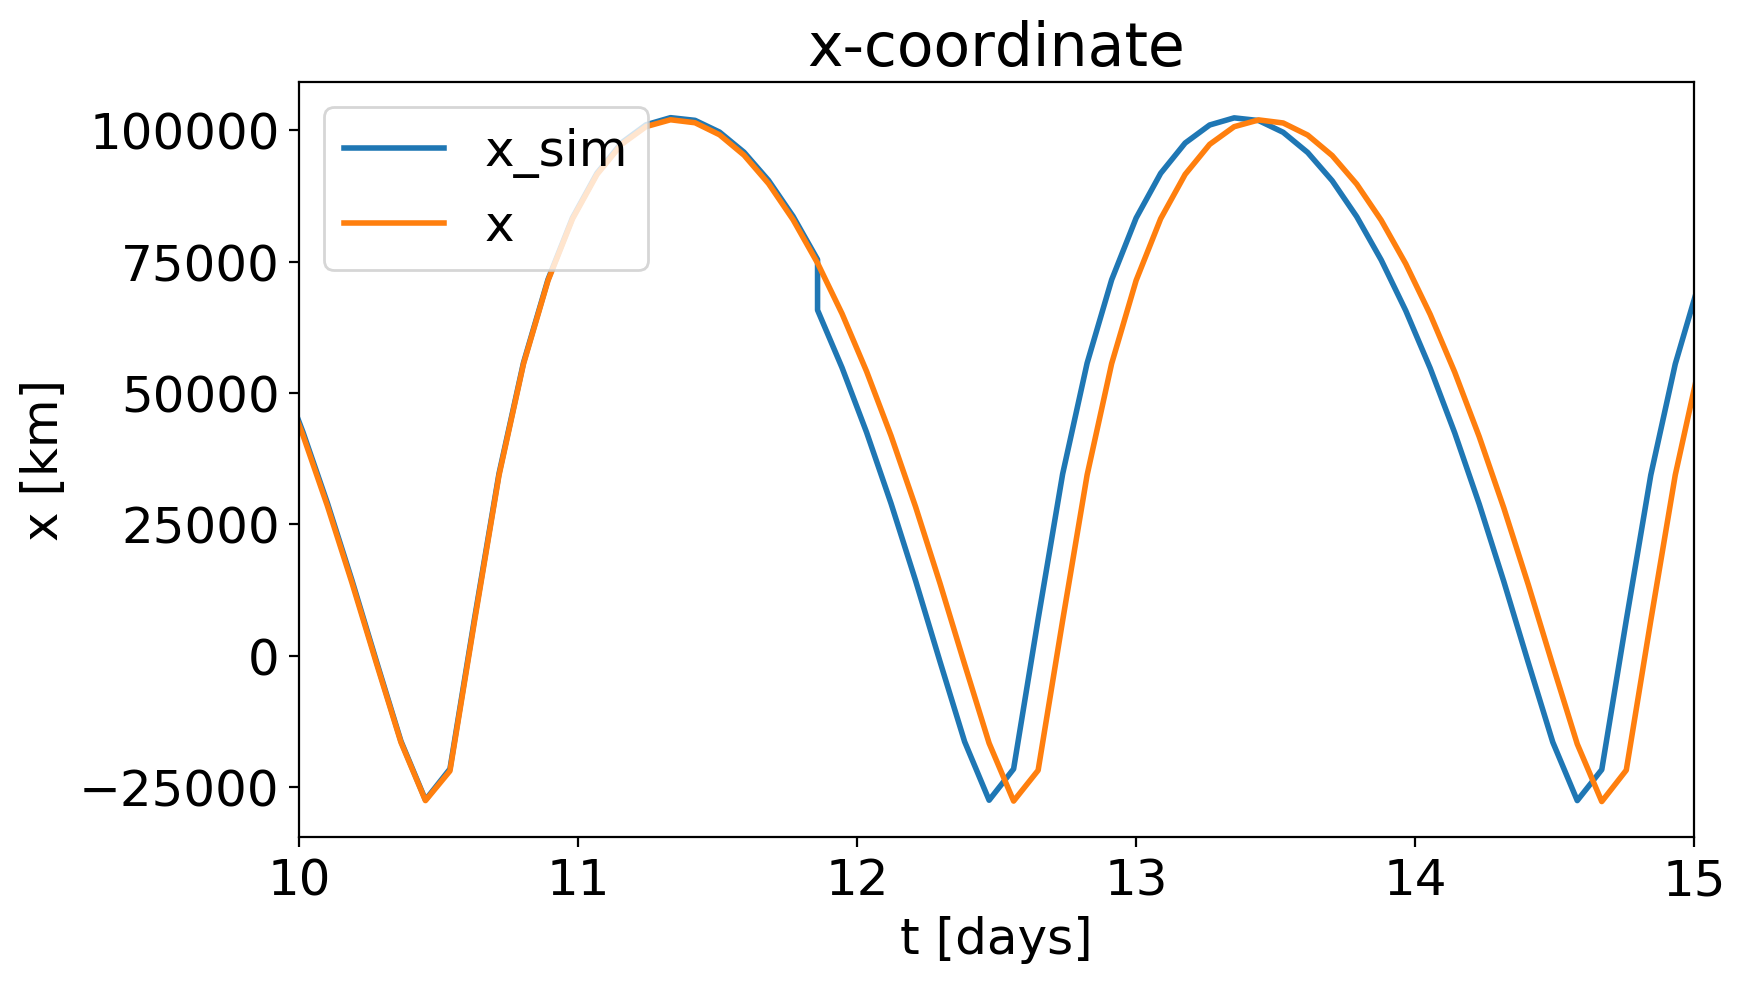

In [119]:
sat_data = data[data.sat_id == 3]
sat_data.loc[:,'t'] = ((pd.to_datetime(sat_data['epoch']) - pd.to_datetime(sat_data['epoch']).iloc[0]) /
                           np.timedelta64(1, 'D')).astype(float).values
sat_data.loc[:,'r'] = np.sqrt(sat_data.x**2+sat_data.y**2+sat_data.z**2)
sat_data.loc[:,'r_sim'] = np.sqrt(sat_data.x_sim**2+sat_data.y_sim**2+sat_data.z_sim**2)
plt.figure(figsize=(9,5), dpi = 200)
plt.plot(sat_data.t, sat_data.x_sim, label = 'x_sim', linewidth = 2)
plt.plot(sat_data.t, sat_data.x, label = 'x', linewidth = 2)
_ = plt.xlabel('t [days]')
_ = plt.ylabel('x [km]')
_ = plt.title('x-coordinate')
_ = plt.xlim([10,15])
plt.legend(loc = 2)

### Distribution of orbit radii 

In [91]:
data['radius'] = np.sqrt(data.x**2+data.y**2+data.z**2)
data['radius_sim'] = np.sqrt(data.x_sim**2+data.y_sim**2+data.z_sim**2)

data['speed'] = np.sqrt(data.Vx**2+data.Vy**2+data.Vz**2)
data['speed_sim'] = np.sqrt(data.Vx_sim**2+data.Vy_sim**2+data.Vz_sim**2)

In [92]:
orbits = data.groupby('sat_id').agg({'radius':['max','min','mean'],
                                     'radius_sim':['max','min','mean'],
                                     'speed':['max','min','mean'],
                                     'speed_sim':['max','min','mean'],
                                     'epoch':['count']
                                    })
orbits.head()

radius                                 radius_sim  \
                  max           min          mean            max   
sat_id                                                             
0        45456.138231  26055.667966  37089.673093   45435.618165   
1        33145.178842   9480.338813  24043.492758   30996.602074   
2        88525.178417  35946.367097  67593.872562   88483.865249   
3       113037.471222  25800.000000  83386.906541  113128.505398   
4        40864.306203  20345.080776  32285.104148   40856.798043   

                                       speed                     speed_sim  \
                 min          mean       max       min      mean       max   
sat_id                                                                       
0       26066.565345  37078.116172  4.409858  2.527665  3.274538  4.408323   
1       11221.720940  23437.131825  8.074972  2.274235  4.023999  7.222133   
2       35999.113542  67569.020677  3.971576  1.613108  2.421667  3.967548   
3       25746.357849  83402.369379  5.015947  1.145381  2.130393  5.022338   
4       20345.825704  32296.162950  5.114521  2.546358  3.509986  5.114330   

                           epoch  
             min      mean count  
sat_id                            
0       2.529023  3.275160   958  
1       2.614980  4.093842  2108  
2       1.614284  2.422313   417  
3       1.143397  2.130242   354  
4       2.546816  3.508198  1210

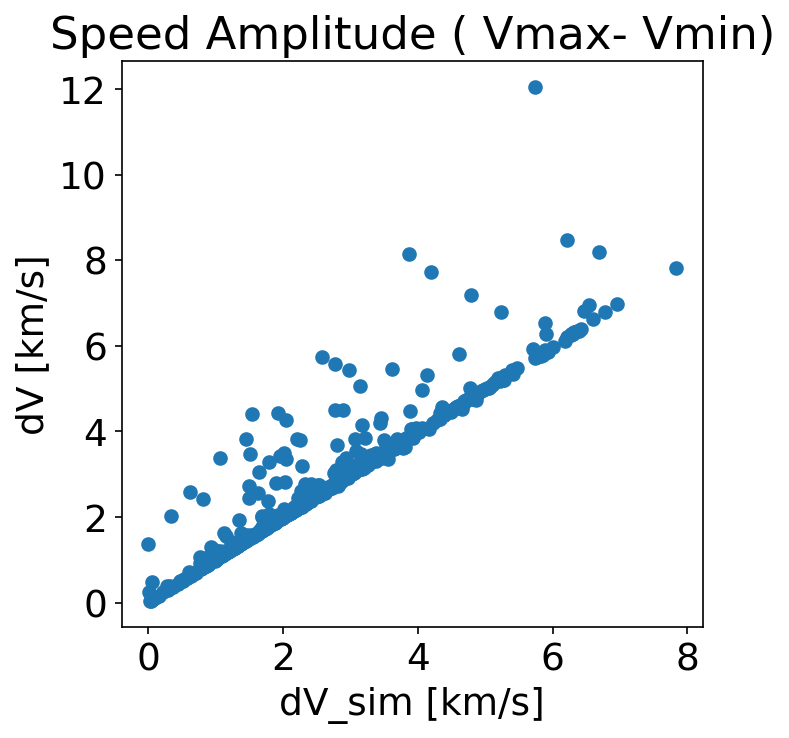

In [105]:
plt.figure(figsize=(5,5), dpi = 150)
plt.scatter(orbits.speed_sim['max']- orbits.speed_sim['min'],orbits.speed['max']-orbits.speed['min'])
_ = plt.xlabel('dV_sim [km/s]')
_ = plt.ylabel('dV [km/s]')
_ = plt.title('Speed Amplitude ( Vmax- Vmin)')